## Credit Card Customer Attrition Analysis

#### Attribute Information

CLIENTNUM:Client number.<br>
Attrition_Flag:Internal event(customer activity) variable - if the account is closed then 1 else 0.<br>
Customer_Age:Customer's age in years.<br>
Gender:M = Male, F = Female.<br>
Dependent_count:Number of dependents.<br>
Education_Level:Educational qualification of the account holder.<br>
Marital_Status:Married, Single, Unknown.<br>
Income_Category:Annual income category of the account holder.<br>
Card_Category:Type of card.<br>
Months_on_book:Months on book(time of relationship).<br>
Total_Relationship_Count:Total number of products held by the customer.<br>
Months_Inactive_12_mon:Number of months inactive in the last 12 months.<br>
Contacts_Count_12_mon:Number of contacts in the last 12 months.<br>
Credit_Limit:Credit limit on the credit card.<br>
Total_Revolving_Bal:Total revolving balance on the credit card.<br>
Avg_Open_To_Buy:Open to buy credit line(average of last 12 months).<br>
Total_Amt_Chng_Q4_Q1:Change in transaction amount(Q4 over Q1).<br> 
Total_Trans_Amt:Total transaction amount(last 12 months).<br>
Total_Trans_Ct:Total transaction count(last 12 months).<br>
Total_Ct_Chng_Q4_Q1:Change in transaction count(Q4 over Q1).<br>
Avg_Utilization_Ratio:Average card utilization ratio.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from numpy import median
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
sns.set_style('darkgrid')
sns.set_palette('bone')

In [2]:
data = pd.read_csv('BankChurners.csv')
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [3]:
#此二變數意義不明故移除
data.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
           'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
          axis = 1, inplace = True)

In [4]:
data.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [5]:
data.columns = ['ID', 'Attrition', 'Age', 'Gender','Dependent', 'Education',
                'Marital_Status','Income', 'Card_Category', 'Months_on_book',
                'Total_Relationship_Count', 'Months_Inactive','Contacts',
                'Credit_Limit', 'Revolving_Bal','Avg_Open_To_Buy', 'Amt_Change_Q4_Q1',
                'Trans_Amt','Trans_Count', 'Count_Change_Q4_Q1', 'Avg_Utilization_Ratio']

In [6]:
print('Duplicates:',data.duplicated().sum())
print('Duplicates of ID:', data['ID'].duplicated().sum())

Duplicates: 0
Duplicates of ID: 0


In [7]:
data.drop('ID', axis = 1, inplace = True)

In [8]:
data.isna().sum()

Attrition                   0
Age                         0
Gender                      0
Dependent                   0
Education                   0
Marital_Status              0
Income                      0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive             0
Contacts                    0
Credit_Limit                0
Revolving_Bal               0
Avg_Open_To_Buy             0
Amt_Change_Q4_Q1            0
Trans_Amt                   0
Trans_Count                 0
Count_Change_Q4_Q1          0
Avg_Utilization_Ratio       0
dtype: int64

In [9]:
df = data.copy()

#### Categorical Variables

In [10]:
cat_feat = df.dtypes[df.dtypes == object].index.to_list()
cat_feat

['Attrition',
 'Gender',
 'Education',
 'Marital_Status',
 'Income',
 'Card_Category']

##### Attrition

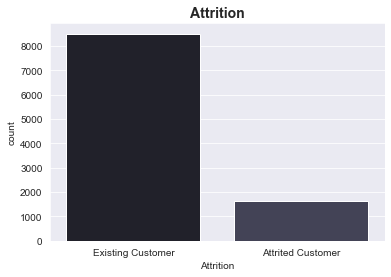

Existing Customer    8500
Attrited Customer    1627
Name: Attrition, dtype: int64


In [11]:
sns.countplot(df['Attrition'])
plt.title('Attrition', fontsize = 14, weight = 'bold')
plt.show()

print(df['Attrition'].value_counts())

##### Gender

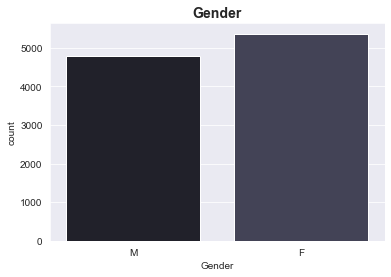

F    5358
M    4769
Name: Gender, dtype: int64


In [12]:
sns.countplot(df['Gender'])
plt.title('Gender', fontsize = 14, weight = 'bold')
plt.show()

print(df['Gender'].value_counts())

##### Education

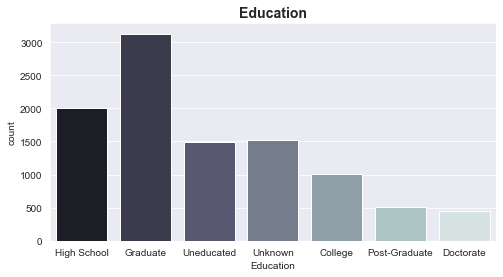

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education, dtype: int64


In [13]:
plt.figure(figsize=(8,4))
sns.countplot(df['Education'], palette='bone')
plt.title('Education', fontsize = 14, weight = 'bold')
plt.show()

print(df['Education'].value_counts())

##### Marital Status

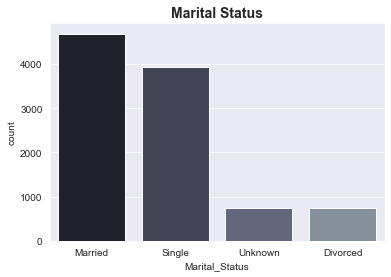

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64


In [14]:
sns.countplot(df['Marital_Status'])
plt.title('Marital Status', fontsize = 14, weight = 'bold')
plt.show()

print(df['Marital_Status'].value_counts())

##### Income

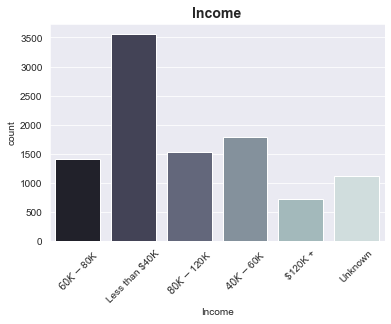

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income, dtype: int64


In [15]:
sns.countplot(df['Income'])
plt.xticks(rotation = 45)
plt.title('Income', fontsize = 14, weight = 'bold')
plt.show()

print(df['Income'].value_counts())

##### Card Category

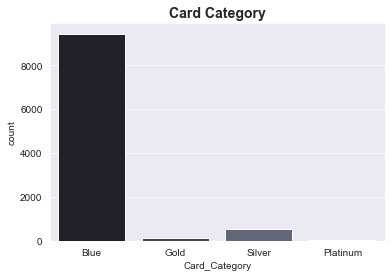

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64


In [16]:
sns.countplot(df['Card_Category'])
plt.title('Card Category', fontsize = 14, weight = 'bold')
plt.show()

print(df['Card_Category'].value_counts())

##### Unknown Values

In [17]:
print('Count of "Unknown" in Columns :')
print(df.isin(['Unknown']).sum()[df.isin(['Unknown']).sum() > 0])
print('Number of rows with "Unknown":',len(df[(df['Education'] == 'Unknown') | (df['Marital_Status'] == 'Unknown') | (df['Income'] == 'Unknown')]))

Count of "Unknown" in Columns :
Education         1519
Marital_Status     749
Income            1112
dtype: int64
Number of rows with "Unknown": 3046


共有3046列含有unknown，大約佔整筆資料的三成，若直接移除將失去大量資料，故保留。

#### Numerical Variables

In [18]:
num_feat = df.drop(cat_feat, axis=1).columns.tolist()
num_feat

['Age',
 'Dependent',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive',
 'Contacts',
 'Credit_Limit',
 'Revolving_Bal',
 'Avg_Open_To_Buy',
 'Amt_Change_Q4_Q1',
 'Trans_Amt',
 'Trans_Count',
 'Count_Change_Q4_Q1',
 'Avg_Utilization_Ratio']

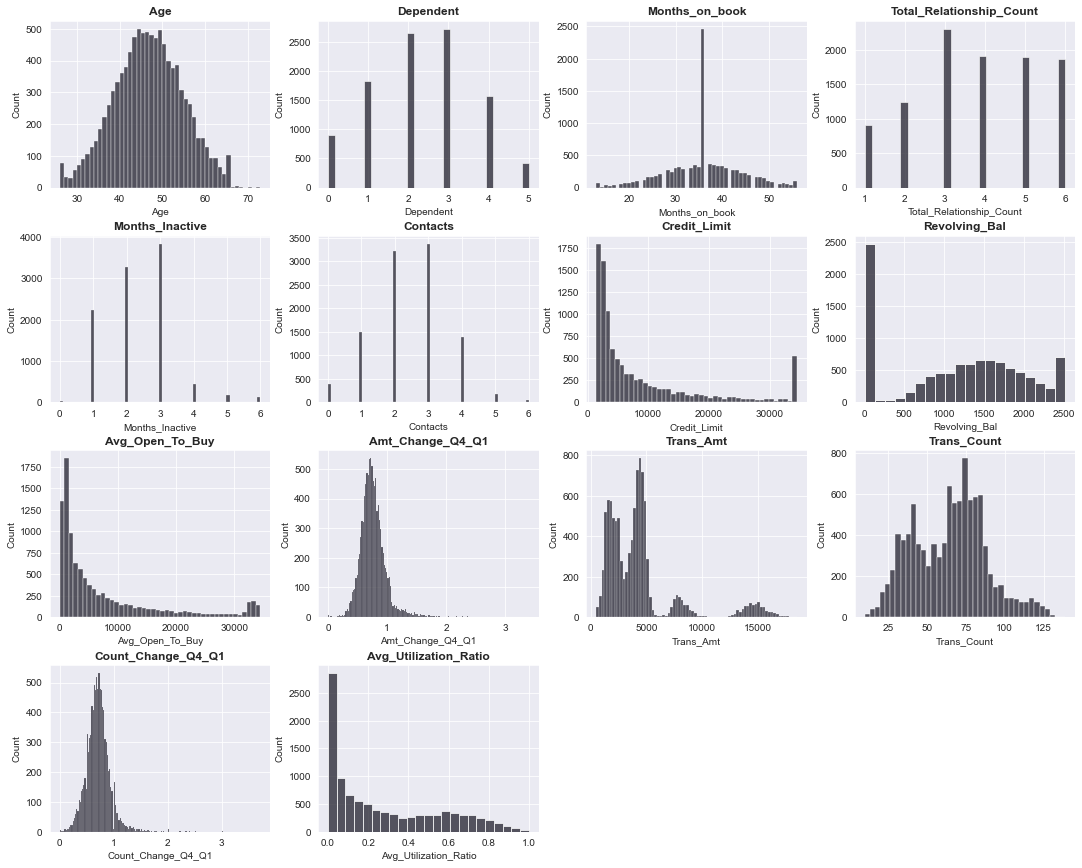

In [19]:
plt.figure(figsize=(15,12))
for i in range(len(num_feat)):
    plt.subplot(4,4,i+1)
    sns.histplot(df[num_feat[i]])
    plt.title(num_feat[i], weight='bold')
plt.tight_layout(pad=0.5)
plt.show()

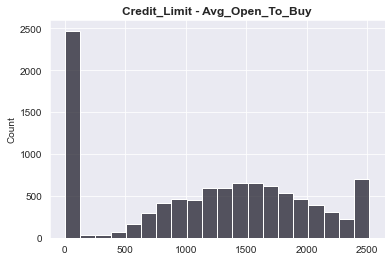

Correlation : 0.9959805439320051


In [20]:
sns.histplot((df['Credit_Limit'] - df['Avg_Open_To_Buy'] ))
plt.title('Credit_Limit - Avg_Open_To_Buy', weight='bold')
plt.show()
print('Correlation :', df['Credit_Limit'].corr(df['Avg_Open_To_Buy']))

變數Credit_Limit與變數Avg_Open_To_Buy之分布情形高度相似，且有大約2500列相等，相關係數也高達0.99，後續須注意共線性問題。

#### EDA

In [21]:
df['target_dummy'] = np.where(df['Attrition'] == 'Attrited Customer', 1, 0)

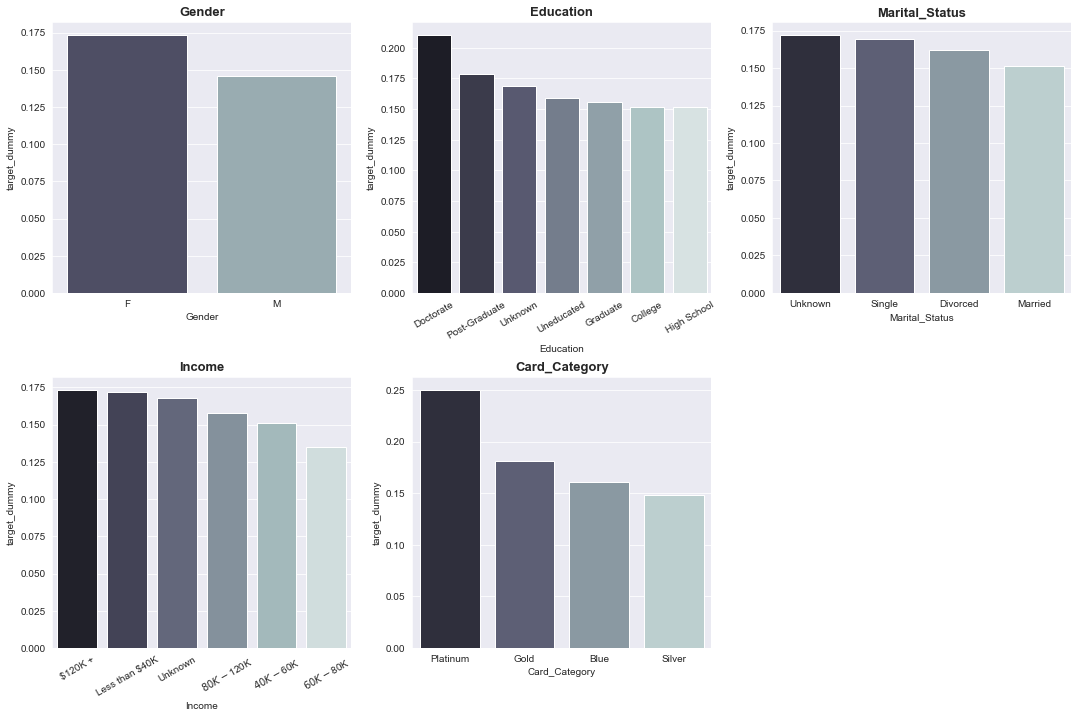

In [22]:
plt.figure(figsize=(15,10))
for i in range(len(cat_feat) - 1):
    locals()['f'+str(i)] = plt.subplot(2,3,i+1)
    sns.barplot(x=df[cat_feat[i+1]], y=df['target_dummy'],
                order=df['target_dummy'].groupby(df[cat_feat[i+1]]).mean().sort_values(ascending=False).index,
                ci=None, palette='bone')
    plt.title(cat_feat[i+1], fontsize=13, weight='bold')
f1.tick_params(axis = 'x',rotation=30)
f3.tick_params(axis = 'x',rotation=30)
plt.tight_layout(pad=0.8)
plt.show()

In [23]:
print('[Attrition Rate]','\n')
for i in cat_feat[1:]:
    for j in range(len(np.unique(df[i]))):
        print(i,[np.unique(df[i])[j]],':',(df[i][(df[i] == np.unique(df[i])[j]) 
              & (df['Attrition'] == 'Attrited Customer')].count() / df[i][df[i] == np.unique(df[i])[j]].count()* 100).round(2),'%',sep = '')

[Attrition Rate] 

Gender['F']:17.36%
Gender['M']:14.62%
Education['College']:15.2%
Education['Doctorate']:21.06%
Education['Graduate']:15.57%
Education['High School']:15.2%
Education['Post-Graduate']:17.83%
Education['Uneducated']:15.94%
Education['Unknown']:16.85%
Marital_Status['Divorced']:16.18%
Marital_Status['Married']:15.13%
Marital_Status['Single']:16.94%
Marital_Status['Unknown']:17.22%
Income['$120K +']:17.33%
Income['$40K - $60K']:15.14%
Income['$60K - $80K']:13.48%
Income['$80K - $120K']:15.77%
Income['Less than $40K']:17.19%
Income['Unknown']:16.82%
Card_Category['Blue']:16.1%
Card_Category['Gold']:18.1%
Card_Category['Platinum']:25.0%
Card_Category['Silver']:14.77%


1. 女性客戶的流失率較高。<br>
2. 碩博士學歷客戶的流失率最高，高中及大專學歷之客戶的流失率最低。<br>
3. 在婚姻狀態方面，單身客戶的流失率最高，其次是離婚者。<br>
4. 收入最高與最低的客戶有較高的流失率，分別佔前二名，而收入在中間區間之客戶的流失率最低。<br>
5. 持白金卡之客戶的流失率最高，其次是金卡，惟須注意的是白金卡客戶的樣本數僅20位。

In [24]:
def box(X,Y):
    sns.boxplot(x=X, y=Y)
    plt.title(Y.name, fontsize=14, weight='bold')
    plt.show()
    display(Y.groupby(X).describe())

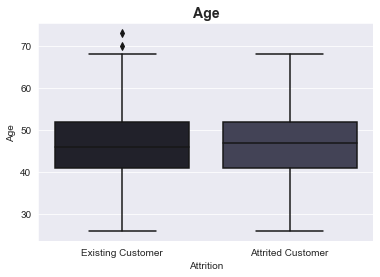

,count,mean,std,min,25%,50%,75%,max
Attrition,,,,,,,,
Attrited Customer,1627.0,46.659496,7.665652,26.0,41.0,47.0,52.0,68.0
Existing Customer,8500.0,46.262118,8.081157,26.0,41.0,46.0,52.0,73.0


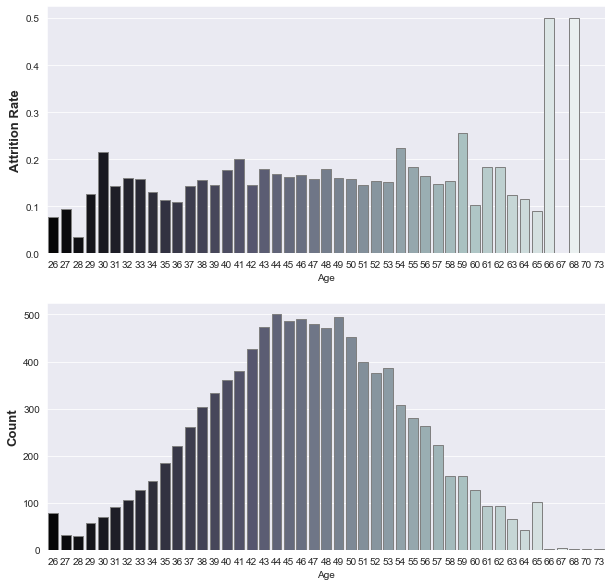

In [25]:
box(df['Attrition'], df['Age'])

plt.figure(figsize=(10,10))
plt.subplot(211)
sns.barplot(x=df['Age'], y=df['target_dummy'], ci=None, palette='bone', edgecolor='grey')
plt.ylabel('Attrition Rate', fontsize=13, weight='bold')
plt.subplot(212)
sns.countplot(x=df['Age'], palette='bone', edgecolor='grey')
plt.ylabel('Count', fontsize=13, weight='bold')
plt.show()

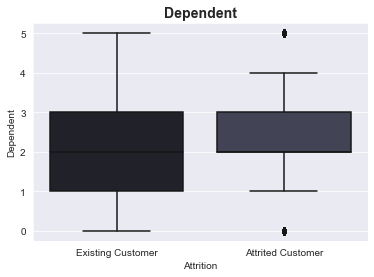

,count,mean,std,min,25%,50%,75%,max
Attrition,,,,,,,,
Attrited Customer,1627.0,2.402581,1.275010,0.0,2.0,2.0,3.0,5.0
Existing Customer,8500.0,2.335412,1.303229,0.0,1.0,2.0,3.0,5.0


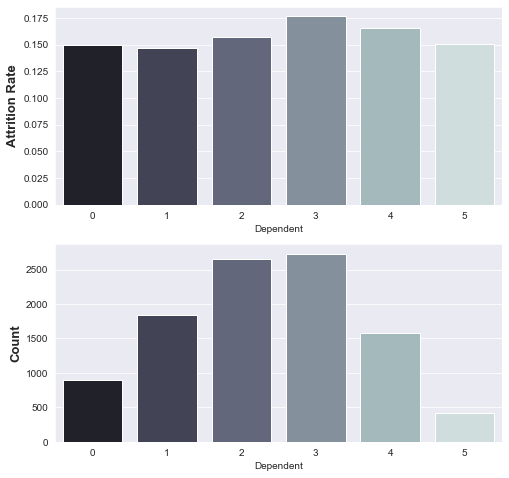

In [26]:
box(df['Attrition'], df['Dependent'])

plt.figure(figsize=(8,8))
plt.subplot(211)
sns.barplot(x=df['Dependent'], y=df['target_dummy'], ci=None)
plt.ylabel('Attrition Rate', fontsize=13, weight='bold')
plt.subplot(212)
sns.countplot(x=df['Dependent'])
plt.ylabel('Count', fontsize=13, weight='bold')
plt.show()

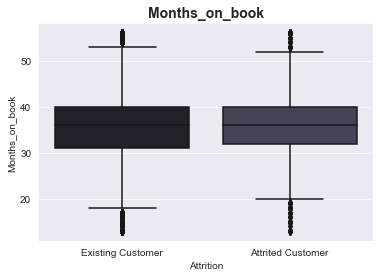

,count,mean,std,min,25%,50%,75%,max
Attrition,,,,,,,,
Attrited Customer,1627.0,36.178242,7.796548,13.0,32.0,36.0,40.0,56.0
Existing Customer,8500.0,35.880588,8.021810,13.0,31.0,36.0,40.0,56.0


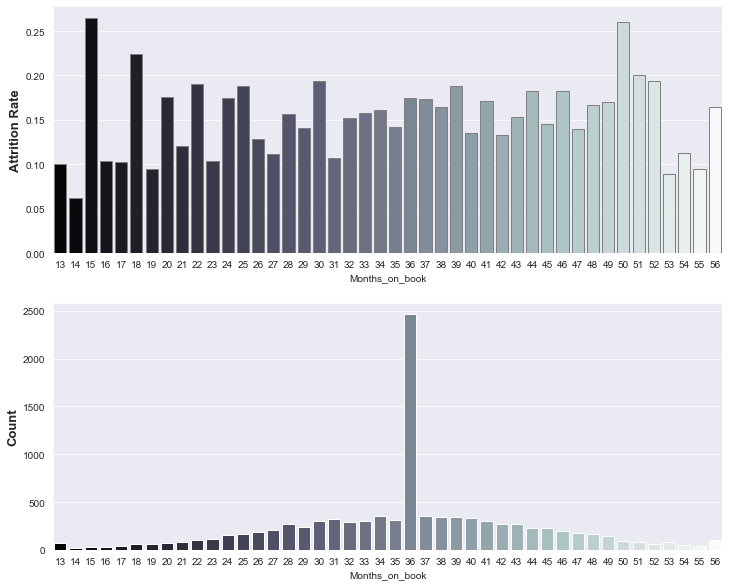

In [27]:
box(df['Attrition'], df['Months_on_book'])
plt.figure(figsize=(12,10))
plt.subplot(211)
sns.barplot(x=df['Months_on_book'], y=df['target_dummy'], ci=None, palette='bone', edgecolor='gray')
plt.ylabel('Attrition Rate', fontsize=13, weight='bold')
plt.subplot(212)
sns.countplot(x=df['Months_on_book'], palette='bone')
plt.ylabel('Count', fontsize=13, weight='bold')
plt.show()

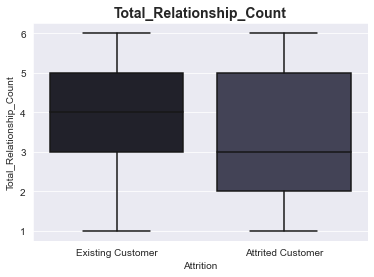

,count,mean,std,min,25%,50%,75%,max
Attrition,,,,,,,,
Attrited Customer,1627.0,3.279656,1.577782,1.0,2.0,3.0,5.0,6.0
Existing Customer,8500.0,3.914588,1.528949,1.0,3.0,4.0,5.0,6.0


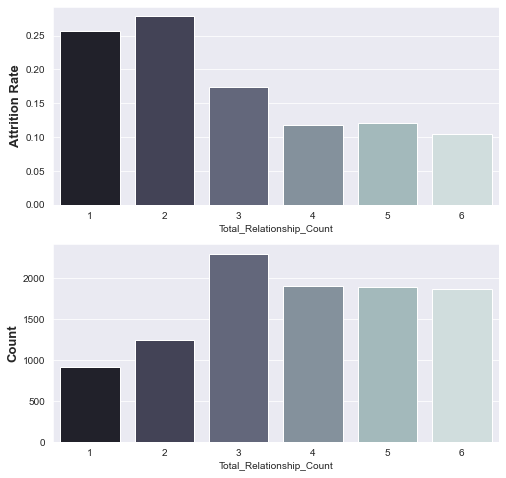

In [28]:
box(df['Attrition'], df['Total_Relationship_Count'])

plt.figure(figsize=(8,8))
plt.subplot(211)
sns.barplot(x=df['Total_Relationship_Count'], y=df['target_dummy'], ci=None)
plt.ylabel('Attrition Rate', fontsize=13, weight='bold')
plt.subplot(212)
sns.countplot(x=df['Total_Relationship_Count'])
plt.ylabel('Count', fontsize=13, weight='bold')
plt.show()

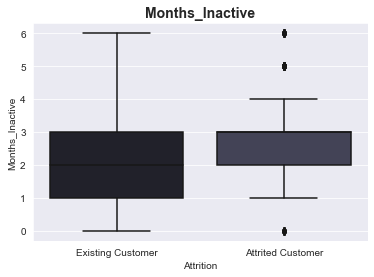

,count,mean,std,min,25%,50%,75%,max
Attrition,,,,,,,,
Attrited Customer,1627.0,2.693301,0.899623,0.0,2.0,3.0,3.0,6.0
Existing Customer,8500.0,2.273765,1.016741,0.0,1.0,2.0,3.0,6.0


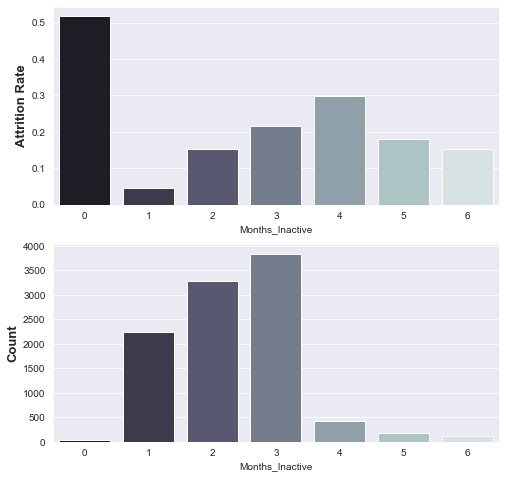

In [29]:
box(df['Attrition'], df['Months_Inactive'])

plt.figure(figsize=(8,8))
plt.subplot(211)
sns.barplot(x=df['Months_Inactive'], y=df['target_dummy'], ci=None, palette='bone')
plt.ylabel('Attrition Rate', fontsize=13, weight='bold')
plt.subplot(212)
sns.countplot(x=df['Months_Inactive'], palette='bone')
plt.ylabel('Count', fontsize=13, weight='bold')
plt.show()

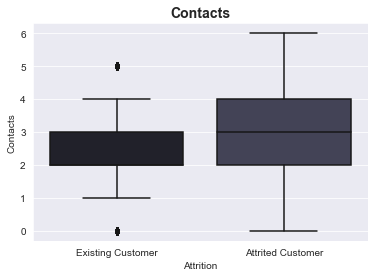

,count,mean,std,min,25%,50%,75%,max
Attrition,,,,,,,,
Attrited Customer,1627.0,2.972342,1.090537,0.0,2.0,3.0,4.0,6.0
Existing Customer,8500.0,2.356353,1.081436,0.0,2.0,2.0,3.0,5.0


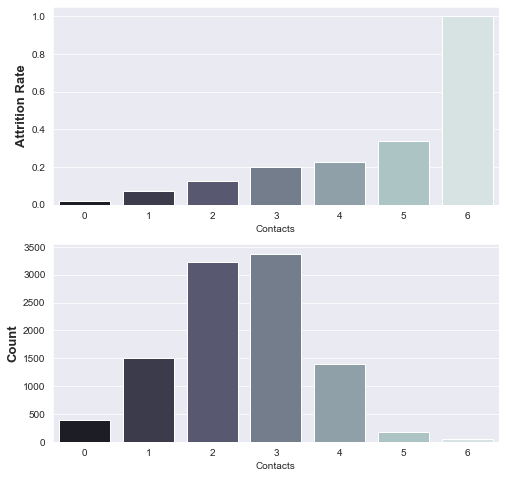

In [30]:
box(df['Attrition'], df['Contacts'])

plt.figure(figsize=(8,8))
plt.subplot(211)
sns.barplot(x=df['Contacts'], y=df['target_dummy'], ci=None, palette='bone')
plt.ylabel('Attrition Rate', fontsize=13, weight='bold')
plt.subplot(212)
sns.countplot(x=df['Contacts'], palette='bone')
plt.ylabel('Count', fontsize=13, weight='bold')
plt.show()

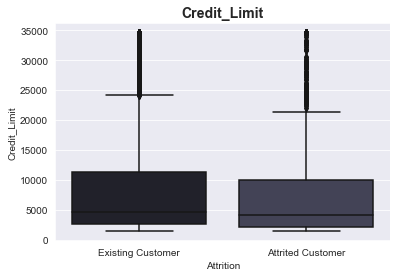

,count,mean,std,min,25%,50%,75%,max
Attrition,,,,,,,,
Attrited Customer,1627.0,8136.039459,9095.334105,1438.3,2114.0,4178.0,9933.50,34516.0
Existing Customer,8500.0,8726.877518,9084.969807,1438.3,2602.0,4643.5,11252.75,34516.0


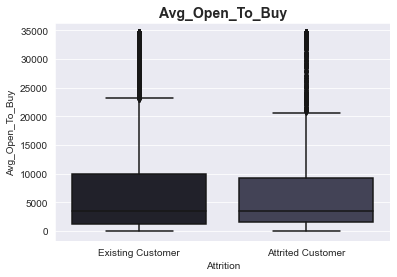

,count,mean,std,min,25%,50%,75%,max
Attrition,,,,,,,,
Attrited Customer,1627.0,7463.216472,9109.208129,3.0,1587.0,3488.0,9257.50,34516.0
Existing Customer,8500.0,7470.273400,9087.671862,15.0,1184.5,3469.5,9978.25,34516.0


In [31]:
box(df['Attrition'], df['Credit_Limit'])
box(df['Attrition'], df['Avg_Open_To_Buy'])

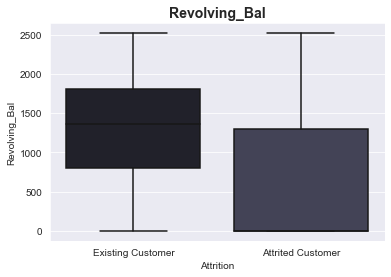

,count,mean,std,min,25%,50%,75%,max
Attrition,,,,,,,,
Attrited Customer,1627.0,672.822987,921.385582,0.0,0.0,0.0,1303.5,2517.0
Existing Customer,8500.0,1256.604118,757.745354,0.0,800.0,1364.0,1807.0,2517.0


In [32]:
box(df['Attrition'], df['Revolving_Bal'])

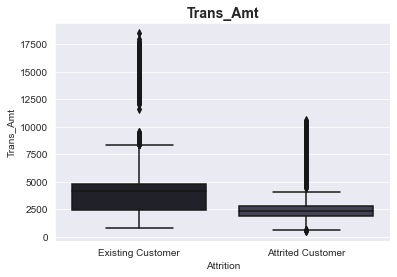

,count,mean,std,min,25%,50%,75%,max
Attrition,,,,,,,,
Attrited Customer,1627.0,3095.025814,2308.227629,510.0,1903.50,2329.0,2772.00,10583.0
Existing Customer,8500.0,4654.655882,3512.772635,816.0,2384.75,4100.0,4781.25,18484.0


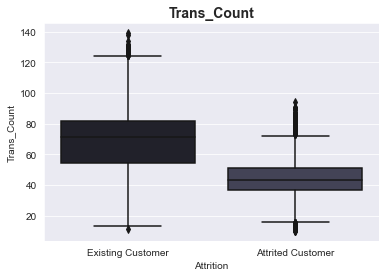

,count,mean,std,min,25%,50%,75%,max
Attrition,,,,,,,,
Attrited Customer,1627.0,44.933620,14.568429,10.0,37.0,43.0,51.0,94.0
Existing Customer,8500.0,68.672588,22.919011,11.0,54.0,71.0,82.0,139.0


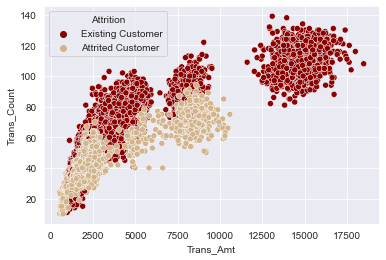

In [33]:
box(df['Attrition'], df['Trans_Amt'])
box(df['Attrition'], df['Trans_Count'])
sns.scatterplot(df['Trans_Amt'], df['Trans_Count'], hue=df['Attrition'], palette=['darkred','tan'])
plt.show()

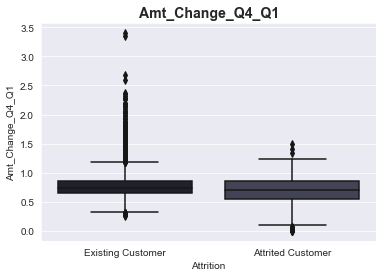

,count,mean,std,min,25%,50%,75%,max
Attrition,,,,,,,,
Attrited Customer,1627.0,0.694277,0.214924,0.000,0.5445,0.701,0.856,1.492
Existing Customer,8500.0,0.772510,0.217783,0.256,0.6430,0.743,0.860,3.397


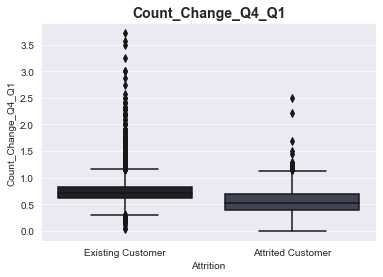

,count,mean,std,min,25%,50%,75%,max
Attrition,,,,,,,,
Attrited Customer,1627.0,0.554386,0.226854,0.000,0.400,0.531,0.692,2.500
Existing Customer,8500.0,0.742434,0.228054,0.028,0.617,0.721,0.833,3.714


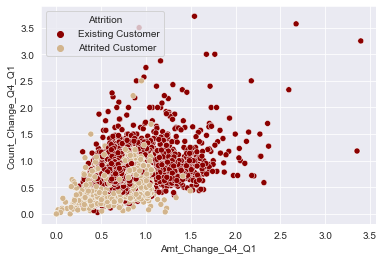

In [34]:
box(df['Attrition'], df['Amt_Change_Q4_Q1'])
box(df['Attrition'], df['Count_Change_Q4_Q1'])
sns.scatterplot(df['Amt_Change_Q4_Q1'], df['Count_Change_Q4_Q1'], hue=df['Attrition'], palette=['darkred','tan'])
plt.show()

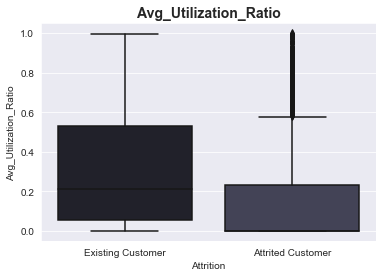

,count,mean,std,min,25%,50%,75%,max
Attrition,,,,,,,,
Attrited Customer,1627.0,0.162475,0.264458,0.0,0.000,0.000,0.23100,0.999
Existing Customer,8500.0,0.296412,0.272568,0.0,0.055,0.211,0.52925,0.994


In [35]:
box(df['Attrition'], df['Avg_Utilization_Ratio'])

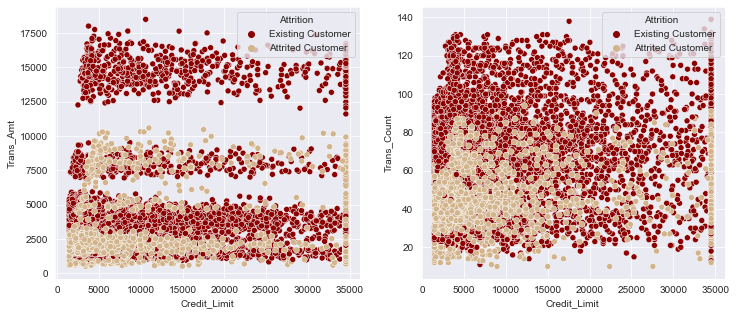

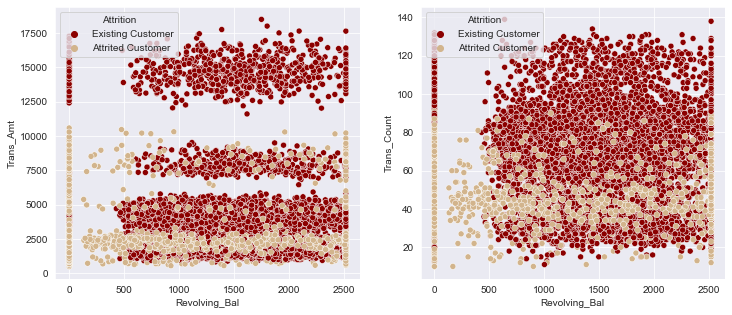

In [36]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.scatterplot(x=df['Credit_Limit'], y=df['Trans_Amt'], hue=df['Attrition'], palette=['darkred','tan'])
plt.subplot(122)
sns.scatterplot(x=df['Credit_Limit'], y=df['Trans_Count'], hue=df['Attrition'], palette=['darkred','tan'])
plt.show()

plt.figure(figsize=(12,5))
plt.subplot(121)
sns.scatterplot(x=df['Revolving_Bal'], y=df['Trans_Amt'], hue=df['Attrition'], palette=['darkred','tan'])
plt.subplot(122)
sns.scatterplot(x=df['Revolving_Bal'], y=df['Trans_Count'], hue=df['Attrition'], palette=['darkred','tan'])
plt.show()

1.年齡與客戶流失率無顯著關聯，現存客戶與已流失客戶的平均年齡幾乎無異。<BR>
2.兩種客戶的平均扶養人數皆為二，扶養人數與流失率無線性關係，流失率在客戶扶養人數為三時最高。<BR>
3.兩種客戶的平均開卡月數皆為36個月，開卡月數的多寡與流失率無顯著關聯。<BR>
4.現存客戶的平均持卡數比已流失客戶多出一張，且隨著持卡數增加，流失率有降低趨勢。<BR>
5.流失客戶的平均無刷卡月數(最近12個月)比現存客戶多出一個月。<BR>
6.現存客戶的平均信用卡額度上限較高，平均信用額度(最近12個月之平均)則無明顯差距。<BR>
7.現存客戶的總循環餘額之中位數為1364，而流失客戶為0。<BR>
8.現存客戶的總交易金額與總交易次數皆大幅高於流失客戶。<BR>
9.在交易金額與交易次數變化方面(Q4相較Q1)，現存客戶的交易金額之變化比流失客戶高出4%左右；交易次數則是高出20%左右。<BR>
10.現存客戶的信用卡使用率大幅高於流失客戶，流失客戶的使用率之中位數為0。<BR>
11.從散布圖可看出信用卡餘額上限以及信用額度皆與交易金額、次數無線性關聯。<BR>

In [37]:
df1 = df.copy()

#### Outlier

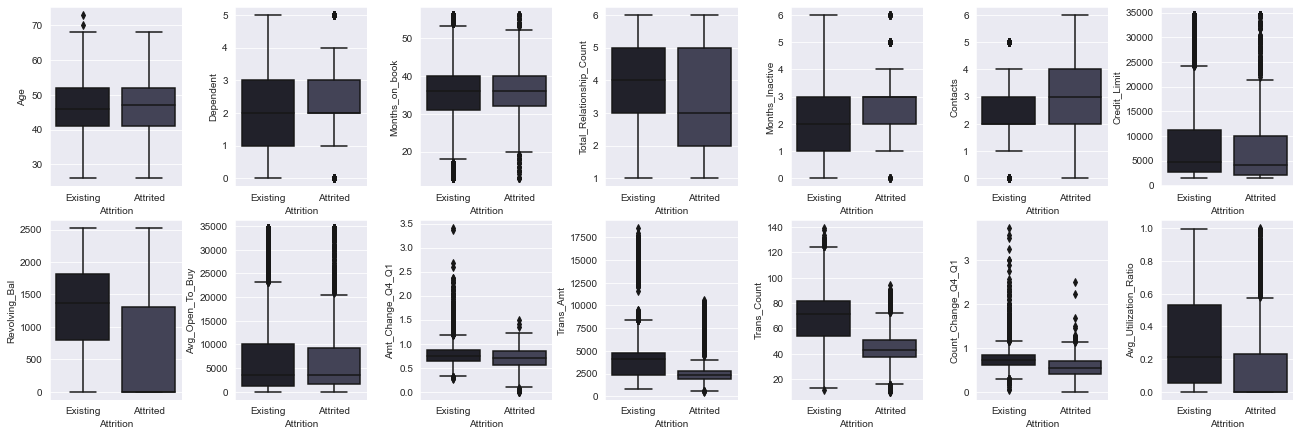

In [38]:
plt.figure(figsize=(18,6))
for i in range(len(num_feat)):
    plt.subplot(2,7,i+1)
    sns.boxplot(x = df1['Attrition'], y = df1[num_feat[i]])
    plt.xticks([0,1], ['Existing','Attrited'])
plt.tight_layout(pad=0.5)
plt.show()

In [39]:
def remove_outlier(data,target,feat,value):
    n = 3
    IQR = data[feat].groupby(data[target]).quantile(.75) - data[feat].groupby(data[target]).quantile(.25)
    upper = (data[feat].groupby(data[target]).quantile(.75) + n * IQR)[value]
    lower = (data[feat].groupby(data[target]).quantile(.25) - n * IQR)[value]
    
    data = data.drop(data[(data[target] == value)&(data[feat] > upper)].index, axis=0)
    data = data.drop(data[(data[target] == value)&(data[feat] < lower)].index, axis=0)
    
    return data

In [40]:
for i in num_feat:
    for j in df1['Attrition'].unique():
        df1 = remove_outlier(df1, 'Attrition', i, j)

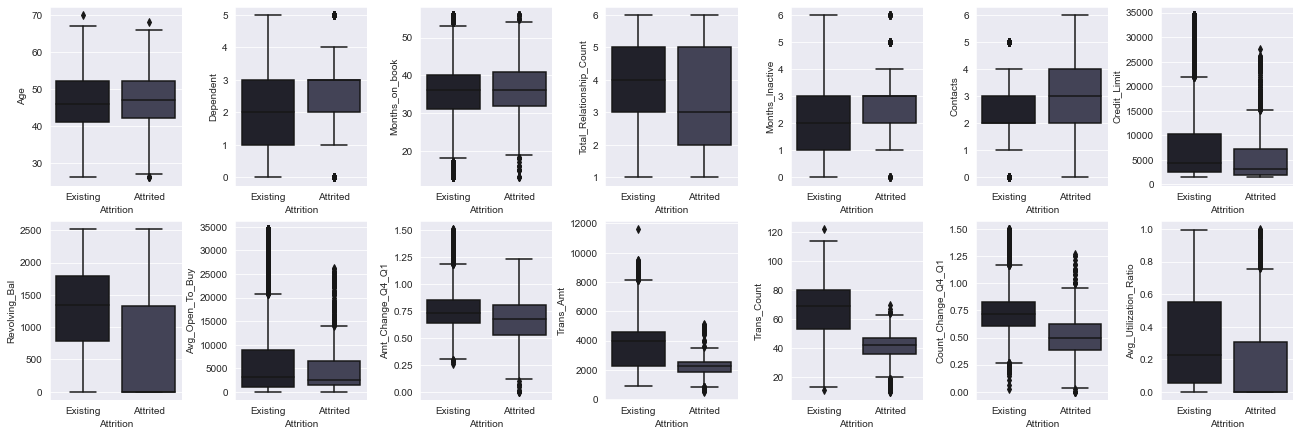

In [41]:
plt.figure(figsize=(18,6))
for i in range(len(num_feat)):
    plt.subplot(2,7,i+1)
    sns.boxplot(x = df1['Attrition'], y = df1[num_feat[i]])
    plt.xticks([0,1], ['Existing','Attrited'])
plt.tight_layout(pad=0.5)
plt.show()

#### Dummies

In [42]:
df1[cat_feat].head()

,Attrition,Gender,Education,Marital_Status,Income,Card_Category
5,Existing Customer,M,Graduate,Married,$40K - $60K,Blue
10,Existing Customer,M,Uneducated,Unknown,$120K +,Blue
11,Existing Customer,M,Unknown,Married,$40K - $60K,Blue
14,Existing Customer,F,Graduate,Married,Less than $40K,Blue
19,Existing Customer,F,Graduate,Married,Unknown,Blue


In [43]:
df1['Attrition'] = np.where(df1['Attrition']=='Existing Customer', 0, 1)

In [44]:
df1 = pd.get_dummies(df1)

In [45]:
df1.columns

Index(['Attrition', 'Age', 'Dependent', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive', 'Contacts',
       'Credit_Limit', 'Revolving_Bal', 'Avg_Open_To_Buy', 'Amt_Change_Q4_Q1',
       'Trans_Amt', 'Trans_Count', 'Count_Change_Q4_Q1',
       'Avg_Utilization_Ratio', 'target_dummy', 'Gender_F', 'Gender_M',
       'Education_College', 'Education_Doctorate', 'Education_Graduate',
       'Education_High School', 'Education_Post-Graduate',
       'Education_Uneducated', 'Education_Unknown', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Unknown', 'Income_$120K +', 'Income_$40K - $60K',
       'Income_$60K - $80K', 'Income_$80K - $120K', 'Income_Less than $40K',
       'Income_Unknown', 'Card_Category_Blue', 'Card_Category_Gold',
       'Card_Category_Platinum', 'Card_Category_Silver'],
      dtype='object')

In [46]:
df1.drop(['target_dummy','Gender_F','Education_Unknown','Marital_Status_Unknown',
          'Income_Unknown','Card_Category_Blue'],axis=1, inplace=True)

In [47]:
df2 = df1.copy()

#### Collinearity

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools import add_constant

In [49]:
def VIF(data, variables):
    x = data[variables]
    x = add_constant(x)
    vif = pd.DataFrame()
    vif['Feature'] = x.columns
    
    vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    vif = vif[vif['Feature'] != 'const']
    
    return vif

In [50]:
features = df2.drop('Attrition', axis = 1).columns.to_list()

In [51]:
VIF(df2, features).sort_values('VIF', ascending = False)

,Feature,VIF
7,Credit_Limit,inf
8,Revolving_Bal,inf
9,Avg_Open_To_Buy,inf
11,Trans_Amt,4.097848
23,Marital_Status_Married,3.950929
12,Trans_Count,3.922016
24,Marital_Status_Single,3.855569
28,Income_$80K - $120K,3.568760
15,Gender_M,3.483923
27,Income_$60K - $80K,3.379272


In [52]:
df2.drop('Avg_Open_To_Buy', axis = 1, inplace = True)
num_feat.remove('Avg_Open_To_Buy')
features = df2.drop('Attrition', axis = 1).columns.to_list()

In [53]:
VIF(df2, features).sort_values('VIF', ascending = False)

,Feature,VIF
10,Trans_Amt,4.097848
22,Marital_Status_Married,3.950929
11,Trans_Count,3.922016
23,Marital_Status_Single,3.855569
27,Income_$80K - $120K,3.568760
14,Gender_M,3.483923
26,Income_$60K - $80K,3.379272
13,Avg_Utilization_Ratio,3.149245
28,Income_Less than $40K,2.904647
7,Credit_Limit,2.861259


### Modeling

In [54]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [55]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score as cv
from sklearn.model_selection import GridSearchCV

In [56]:
X = df2.drop('Attrition', axis = 1)
y = df2['Attrition']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [58]:
print('X_train :', X_train.shape[0])
print('X_test :', X_test.shape[0])
print('y_train :', y_train.shape[0])
print('y_test :', X_test.shape[0])

X_train : 6220
X_test : 2666
y_train : 6220
y_test : 2666


In [59]:
scaler = StandardScaler()

In [60]:
X_train_scaled = np.hstack((scaler.fit_transform(X_train[num_feat]),np.array(X_train.drop(num_feat, axis = 1))))
X_test_scaled = np.hstack((scaler.fit_transform(X_test[num_feat]),np.array(X_test.drop(num_feat, axis = 1))))

#### Oversampling

In [61]:
X_train_res, y_train_res = SMOTE().fit_resample(X_train, y_train)
X_train_scaled_res, y_train_scaled_res = SMOTE().fit_resample(X_train_scaled, y_train)

#### Cross-validation

In [62]:
log_reg = LogisticRegression()
log_reg_score = cv(log_reg, X_train_scaled, y_train, cv=10, n_jobs=-1)
log_reg_mean = log_reg_score.mean()

log_reg_res_score = cv(log_reg, X_train_scaled_res, y_train_scaled_res, cv=10, n_jobs=-1)
log_reg__res_mean = log_reg_res_score.mean()

knn = KNeighborsClassifier()
knn_score = cv(knn, X_train_scaled, y_train, cv=10, n_jobs=-1)
knn_mean = knn_score.mean()

knn_res_score = cv(knn, X_train_scaled_res, y_train_scaled_res, cv=10, n_jobs=-1)
knn__res_mean = knn_res_score.mean()

svc = SVC()
svc_score = cv(svc, X_train_scaled, y_train, cv=10, n_jobs=-1)
svc_mean = svc_score.mean()

svc_res_score = cv(svc, X_train_scaled_res, y_train_scaled_res, cv=10, n_jobs=-1)
svc_res_mean = svc_res_score.mean()

rf = RandomForestClassifier()
rf_score = cv(rf, X_train, y_train, cv=10, n_jobs=-1)
rf_mean = rf_score.mean()

rf_res_score = cv(rf, X_train_res, y_train_res, cv=10, n_jobs=-1)
rf_res_mean = rf_res_score.mean()

gb = GradientBoostingClassifier()
gb_score = cv(gb, X_train, y_train, cv=10, n_jobs=-1)
gb_mean = gb_score.mean()

gb_res_score = cv(gb, X_train_res, y_train_res, cv=10, n_jobs=-1)
gb_res_mean = gb_res_score.mean()

result = ({'Model':['Logistic Regression','Logistic Regression SMOTE',
                    'KNN','KNN SMOTE',
                    'SVC','SVC SMOTE',
                    'Random Forest','Random Forest SMOTE',
                    'Gradient Boosting','Gradient Boosting SMOTE'],
           'Mean Score':[log_reg_mean, log_reg__res_mean, knn_mean, knn__res_mean, svc_mean, svc_res_mean,
                         rf_mean, rf_res_mean, gb_mean, gb_res_mean]})
train_score = pd.DataFrame(result)

In [63]:
train_score.sort_values('Mean Score', ascending=False)

,Model,Mean Score
7,Random Forest SMOTE,0.976561
9,Gradient Boosting SMOTE,0.973279
8,Gradient Boosting,0.970740
5,SVC SMOTE,0.966713
6,Random Forest,0.963826
4,SVC,0.944534
3,KNN SMOTE,0.938580
2,KNN,0.930386
0,Logistic Regression,0.917846
1,Logistic Regression SMOTE,0.892257


經交叉驗證後，以過採樣之數據訓練的隨機森林模型有最佳表現。

##### Random Forest

In [64]:
rf_param = {'n_estimators':[None,150,200,250],
            'max_depth':[None,10,20,30],
            'max_features':[None,'sqrt'],
            'max_samples':[0.68,0.8,1]}
rf_gscv = GridSearchCV(rf, rf_param, cv=10, n_jobs=-1)

In [65]:
rf_gscv.fit(X_train_res, y_train_res)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': [None, 'sqrt'],
                         'max_samples': [0.68, 0.8, 1],
                         'n_estimators': [None, 150, 200, 250]})

In [66]:
rf_gscv.best_estimator_

RandomForestClassifier(max_depth=30, max_features='sqrt', max_samples=0.8,
                       n_estimators=250)

In [67]:
RF_model = RandomForestClassifier(n_estimators=250,
                                  max_depth=30,
                                  max_features='sqrt',
                                  max_samples=0.8,
                                  random_state=42)
RF_model.fit(X_train_res, y_train_res)
y_pred_rf = RF_model.predict(X_test)
print('Train Score:', RF_model.score(X_train_res, y_train_res))
print('Test Score:', metrics.accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Train Score: 1.0
Test Score: 0.9527381845461366
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2262
           1       0.84      0.85      0.84       404

    accuracy                           0.95      2666
   macro avg       0.91      0.91      0.91      2666
weighted avg       0.95      0.95      0.95      2666



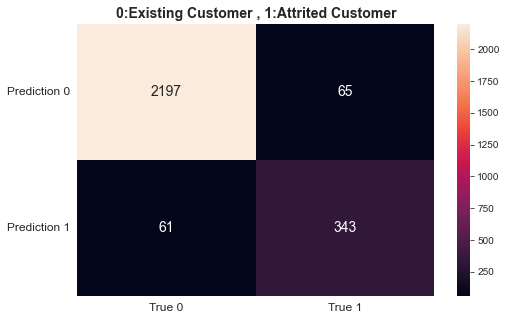

In [68]:
plt.figure(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred_rf),
            annot=True,
            annot_kws={'size':14},
            fmt='d',
            yticklabels=['Prediction 0', 'Prediction 1'],
            xticklabels=['True 0', 'True 1'])
plt.title('0:Existing Customer , 1:Attrited Customer', fontsize=14, weight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12, rotation=360)
plt.show()